In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt

import vast11data as vast

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
portcount = defaultdict(int)
for i, event in enumerate(vast.parse_all_fw_events()):
    port = event.dest_port
    if port is not None:
        portcount[port] += 1

parsing file: /Users/dbeach/Desktop/MiniChallenge2 Core Data/20110413/firewall/csv/20110413_VAST11MC2_firewall_log_1.csv
parsing file: /Users/dbeach/Desktop/MiniChallenge2 Core Data/20110413/firewall/csv/20110413_VAST11MC2_firewall_log_2.csv
parsing file: /Users/dbeach/Desktop/MiniChallenge2 Core Data/20110413/firewall/csv/20110413_VAST11MC2_firewall_log_3.csv
parsing file: /Users/dbeach/Desktop/MiniChallenge2 Core Data/20110413/firewall/csv/20110413_VAST11MC2_firewall_log_4.csv
parsing file: /Users/dbeach/Desktop/MiniChallenge2 Core Data/20110413/firewall/csv/20110413_VAST11MC2_firewall_log_5.csv
parsing file: /Users/dbeach/Desktop/MiniChallenge2 Core Data/20110414/firewall/csv/20110414_VAST11MC2_firewall_log.csv
Skipping INVALID LINE: []
parsing file: /Users/dbeach/Desktop/MiniChallenge2 Core Data/20110415/firewall/csv/20110415_VAST11MC2_firewall_log.csv
Skipping INVALID LINE: []


In [15]:
K = 20

allvals = [count for port, count in portcount.items() if port < 1024]
allvals.sort(reverse=True)

thresh = allvals[K]

topports = [(port, count) for port, count in portcount.items() if count > thresh and port < 1024]
topports.sort(key=lambda x: x[1], reverse=True)


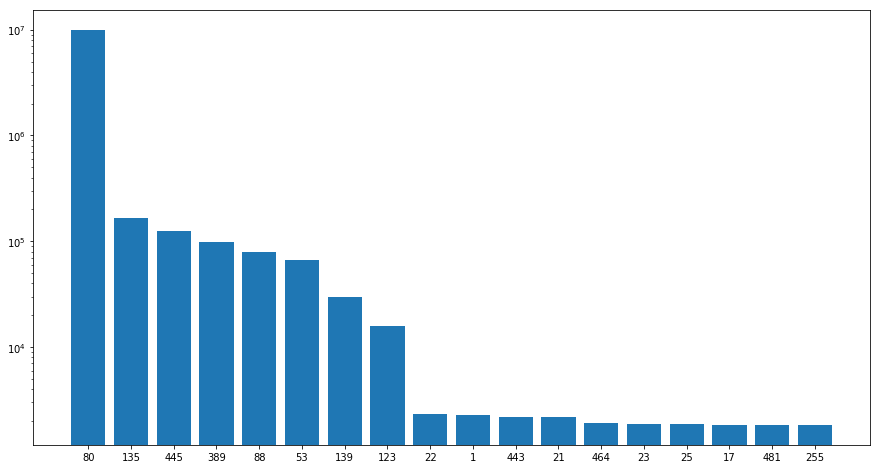

In [16]:
N = len(topports)
plt.figure(figsize=(15,8))
plt.bar(list(range(N)), [x[1] for x in topports])
plt.xticks(list(range(N)), [x[0] for x in topports])
plt.yscale('log')

In [17]:
SERVICES = {
    1: "Mux",
    17: "Quote",
    21: "FTP",
    22: "SSH",
    23: "Telnet",
    25: "SMTP",
    53: "DNS",
    80: "HTTP",
    88: "Kerberos",
    123: "NTP",
    135: "DCE",
    139: "NETBIOS",
    255: "Reserved",
    389: "LDAP",
    443: "HTTPS",
    445: "Microsoft-DS",
    464: "kpasswd",
    481: "ph",
}

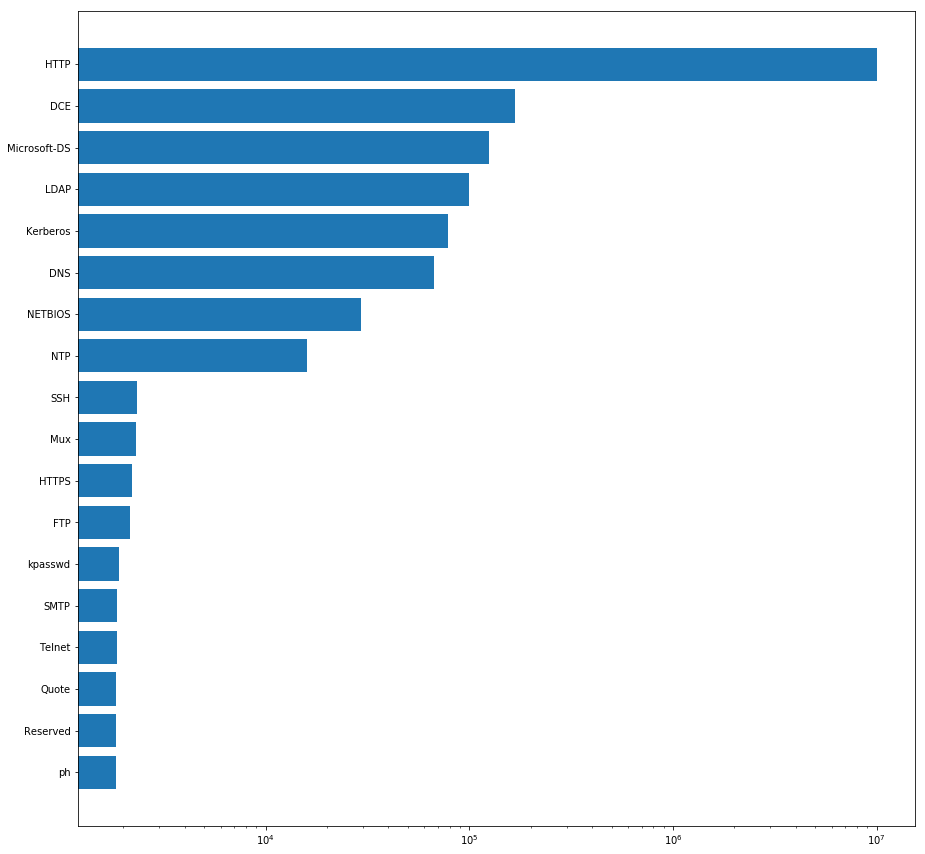

In [21]:
N = len(topports)
topports.sort(key=lambda x: x[1])
plt.figure(figsize=(15,15))
plt.barh(list(range(N)), [x[1] for x in topports])
plt.yticks(list(range(N)), [SERVICES[x[0]] for x in topports])
plt.xscale('log')